## Mount Google Drive & Set Paths

In [1]:
import os
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
base_dir = "/content/drive/MyDrive/Skin-Cancer-Detection/data"
image_dir = os.path.join(base_dir, "HAM10000")
csv_path = os.path.join(base_dir, "HAM10000_metadata.csv")

In [4]:
df = pd.read_csv(csv_path)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Filter Duplicates by Lesion ID

In [5]:
lesion_counts = df['lesion_id'].value_counts()
unique_lesions = lesion_counts[lesion_counts == 1].index
df_single = df[df['lesion_id'].isin(unique_lesions)].copy()

print(f"Unique lesions selected: {len(df_single)} out of {len(df)}")

Unique lesions selected: 5514 out of 10015


### Visualize Diagnosis Distribution in Duplicate Lesions

In [6]:
single_dx_counts = df_single['dx'].value_counts().reset_index()
single_dx_counts.columns = ['Diagnosis', 'Count']

single_dx_counts['hue'] = single_dx_counts['Diagnosis']

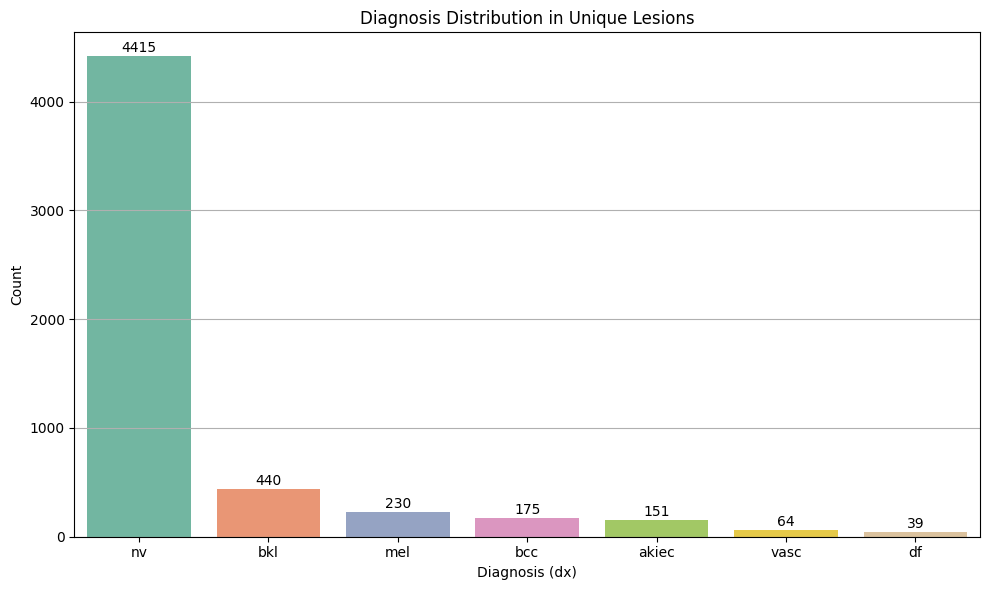

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=single_dx_counts, x='Diagnosis', y='Count', hue='hue', palette='Set2')

for i, row in single_dx_counts.iterrows():
    ax.text(i, row['Count'] + 10, str(row['Count']), ha='center', va='bottom', fontsize=10)

plt.title('Diagnosis Distribution in Unique Lesions')
plt.xlabel('Diagnosis (dx)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()